In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [2]:
def plot_half_moon(X, y):
    #from https://github.com/dennybritz/nn-from-scratch/blob/master/nn-from-scratch.ipynb
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    yy = yy.astype('float32')
    xx = xx.astype('float32')
    # Predict the function value for the whole gid
    # y = y.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure()
    # plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=-y, cmap=plt.cm.Spectral)

In [3]:
X, y = sklearn.datasets.make_moons(n_samples=500, noise=0.1, random_state=0)

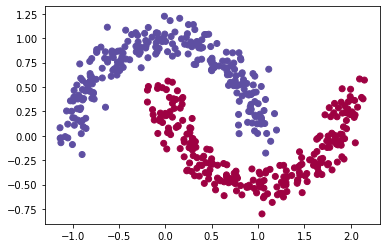

In [4]:
plot_half_moon(X, y)

In [5]:
X_train, y_train = X[:400], y[:400]
X_test, y_test = X[400:], y[400:]

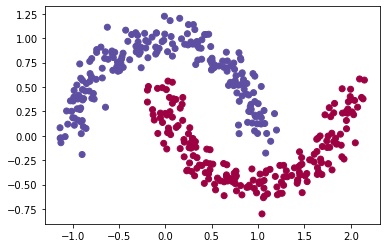

In [6]:
plot_half_moon(X_train, y_train)

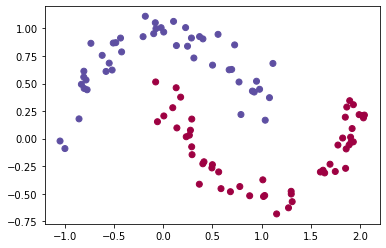

In [7]:
plot_half_moon(X_test, y_test)

In [8]:
import torch
from torch.nn.parameter import Parameter
import torch.nn as nn
import torch.nn.functional as F

/home/jatin/scratch/miniconda3/envs/cnc/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
from torch.utils import data

In [10]:
class Halfmoon(data.Dataset):
    def __init__(self, X, y):
        self.X = X.astype("float32")
        self.y = y.astype("float32")
        
    def __getitem__(self, index):
        return self.X[index], self.y[index]
    
    def __len__(self):
        return len(self.X)

In [11]:
class Network(nn.Module):

    def __init__(self):
        super(Network, self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(2, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )
        
    def forward(self, x):
        return self.layer(x)

teacher = Network()

In [12]:
train_dataset = Halfmoon(X_train, y_train)
train_loader = data.DataLoader(train_dataset, batch_size=32, num_workers=4)

In [14]:
for x,y in train_loader:
    print(teacher(x).shape)
    break

torch.Size([32, 2])
